# EE798 HW1

In [2]:
from scipy.linalg import toeplitz, dft, inv, eigvals, eig
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt 

## Q4 a

In [3]:
def linear_conv_mat(h:np.array,output_size):
    L = h.size
    h_ex = np.zeros(output_size)
    h_ex[0:L] = h
    first_row = np.roll(np.flip(h_ex),1)
    return toeplitz(h_ex.T,first_row[0:(output_size-L+1)]) # H + X - 1 = output_size

### Demonstration 

In [4]:
h = np.array([1,2,3,4,5])
H = linear_conv_mat(h,8)
H


array([[1., 0., 0., 0.],
       [2., 1., 0., 0.],
       [3., 2., 1., 0.],
       [4., 3., 2., 1.],
       [5., 4., 3., 2.],
       [0., 5., 4., 3.],
       [0., 0., 5., 4.],
       [0., 0., 0., 5.]])

### Verification 

In [16]:
x = np.random.randint(0,10,(8))
res = np.convolve(x,h)
H = linear_conv_mat(h,res.size)
res2 = np.matmul(H,x.T)
assert np.array_equal(res,res2)

x = np.random.randint(0,150,(32))
res = np.convolve(x,h)
H2 = linear_conv_mat(h,res.size)
res2 = np.matmul(H2,x.T)
assert np.array_equal(res,res2)

print('All tests are success!')

All tests are success!


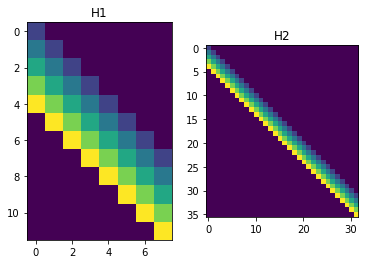

In [17]:
plt.subplot(1,2,1)
plt.imshow(H)
plt.title("H1")
plt.subplot(1,2,2)
plt.title("H2")
plt.imshow(H2)

## Q4 b 

### The circular convolution should be of length $$N = L_x + L_y - 1$$ to obtain linear convolution.

### The sequences $\hat{h} \ and \ \hat{x}$ are zero-padded version of sequences $h \ and \ x$ to the length of the linear convolution. This relationship is hidden inside the fft implementation, which automatically pads zero to the sequence if the FFT points N is larger than length of the sequence L.

In [22]:
def cconv(x:np.array, y:np.array, N:int):
    return np.round(np.real(ifft(np.multiply(fft(x,N),fft(y,N)))),3)


In [24]:
x = [0,1,2]
y = [4,5,6]
print(np.convolve(x,y))
cconv(x,y,5)

[ 0  4 13 16 12]


array([-0.,  4., 13., 16., 12.])

Verification

In [7]:
x = np.random.randint(0,5,(5))
y = np.random.randint(0,5,(4))
N = 8
res = cconv(x,y,N)
print("X = ",x,"\nY = ",y)
print("Linear convolution: ", np.convolve(x,y))
print("Circular convolution with N =", N, ":", res)
N = 6
res = cconv(x,y,N)
print("Circular convolution with N =", N, ":", np.round(res,2))


X =  [3 3 3 4 0] 
Y =  [4 1 1 3]
Linear convolution:  [12 15 18 31 16 13 12  0]
Circular convolution with N = 8 : [ 1.20000000e+01  1.50000000e+01  1.80000000e+01  3.10000000e+01
  1.60000000e+01  1.30000000e+01  1.20000000e+01 -3.55271368e-15]
Circular convolution with N = 6 : [24. 15. 18. 31. 16. 13.]


## Q4 c

### The implementation is based on the transformation of basis vectors of $\mathbb{R}^{N}$ where transform is the circular convolution.

In [25]:
def  cconvmtx(h:np.array, N:int):
    I = np.eye(N)
    for i in range(N):
        I[:,i] = np.round(cconv(h,I[:,i].T,N).T,3)
    return I

In [38]:
N = 1024
Max = 10
for trial in range(10): # Number of test cases
    h = np.random.randint(0,Max,N)
    x = np.random.randint(0,Max,N)
    res = cconv(x,h,N)
    H = cconvmtx(h,N)
    res2 = np.matmul(H,x)
    assert np.sum(np.isclose(res,res2)) == res.size # np.array_equal sometimes outputs False due to precision errors
print("All tests are success!")


All tests are success!


## Q4 d
### Verification 
* N values are swept from 4 to 64 and every case is asserted. 

In [49]:
A = dft(5)
B = inv(A)
C = A.conj()/5
np.sum(np.isclose(B,C)) == B.size


True

In [39]:
for N in range(4,64):
    h = np.random.randint(0,12,N)
    x = np.random.randint(0,12,N)
    F = dft(N)
    X = np.matmul(F,x)
    H = np.matmul(F,h)
    res = np.matmul(inv(F),np.multiply(X,H))
    res2 = cconv(x,h,N)
    assert np.sum(np.isclose(res,res2)) == res.size # np.array_equal may output False due to precision errors
print("All tests are success!")

All tests are success!


## Q4 e

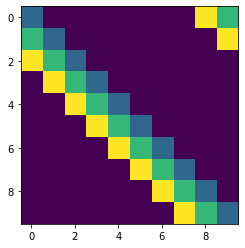

In [53]:
N = 10
H = cconvmtx([1,2,3],N)
plt.imshow(H)

### Verification 

All tests are success!


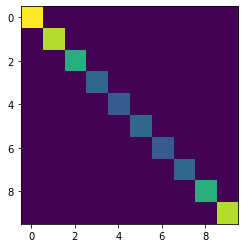

In [56]:
for trial in range(20):
    F = dft(N)
    FCFH = np.round(F.dot(H).dot(inv(F)),1)/N
    assert np.all(FCFH == np.diag(np.diagonal(FCFH)))
print("All tests are success!")
plt.imshow(np.abs(FCFH))